# MNIST Character recognition with neural network

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
print("Setting CUDA devices...")
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="0"
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint, Callback
import numpy as np
import matplotlib
from PIL import Image, ImageFilter
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# Filename of the model weights output
DATA_ROOT = './'
model_weights_file = "mnist_cnn_final_weights.hdf5"


Setting CUDA devices...


Using TensorFlow backend.


In [3]:
def imageprepare(argv):
  """
  This function returns the pixel values.
  The imput is a png file location.
  """
  im = Image.open(argv).convert('L')
  width, height = float(im.size[0]), float(im.size[1])
  newImage = Image.new('L', (28, 28), (255)) #creates white canvas of 28x28 pixels
  
  if width > height: #check which dimension is bigger
    #Width is bigger. Width becomes 20 pixels.
    nheight = int(round((20.0/width*height),0)) #resize height according to ratio width
    if (nheigth == 0): #rare case but minimum is 1 pixel
      nheigth = 1
    # resize and sharpen
    img = im.resize((20,nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
    wtop = int(round(((28 - nheight)/2),0)) #caculate horizontal pozition
    newImage.paste(img, (4, wtop)) #paste resized image on white canvas
  else:
    #Height is bigger. Heigth becomes 20 pixels. 
    nwidth = int(round((20.0/height*width),0)) #resize width according to ratio height
    if (nwidth == 0): #rare case but minimum is 1 pixel
      nwidth = 1
    # resize and sharpen
    img = im.resize((nwidth,20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
    wleft = int(round(((28 - nwidth)/2),0)) #caculate vertical pozition
    newImage.paste(img, (wleft, 4)) #paste resized image on white canvas
  #normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
  tva = 1 - (np.asarray( newImage, dtype="uint8" ) / 255)
  return im, newImage, tva

## Load model
We have to define model architecture then load the pre-computed weights.

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.load_weights(DATA_ROOT + 'mnist_cnn_final_weights.hdf5')

## Prediction
Now that everything is ready we could make a prediction on a custom image.

In [5]:
filename = DATA_ROOT + '7.png'
im_src, im_resize, im_values = imageprepare(filename)

## Input Image

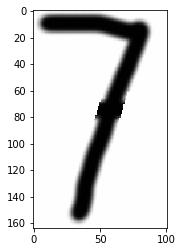

In [6]:
#matplotlib.figure.Figure()
matplotlib.pyplot.imshow(im_src)
#matplotlib.pyplot.show()

## Resized Image

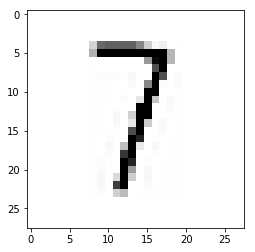

In [7]:
matplotlib.pyplot.imshow(im_resize)

## Resized image converted to 0-1 range

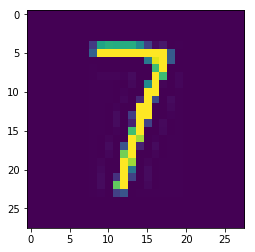

In [8]:
matplotlib.pyplot.imshow(im_values)

We have to reshape the array to add one dimension as the prediction function suppose that we have many images to predict

In [9]:
im_values = im_values.reshape((1, 28, 28, 1))

And now we make the prediction

In [10]:
prediction = model.predict_classes(im_values, verbose=2)
print(prediction)

[7]


7 predicted as expected !